In [1]:
import pandas as pd 

In [47]:
inputfile = 'data/3_clean_zomato_gof_ori_1000.csv'
outputfile = 'data/3_clean_zomato_gof_ori_1000_sampling.csv'

In [48]:
df = pd.read_csv(inputfile)
df = df[df['rating']>0]

In [49]:
df.head()

,index,url,rest_price_idr,review,lat,long,is_chain,rating,alcohol,delivery,...,d_1000_mosque,d_1000_park,d_1000_restaurant,d_1000_school,d_1000_store,d_1000_supermarket,d_1000_train_station,en_1000,n_compt_1000,avg_n_rest
0,0,https://www.zomato.com/jakarta/wakacao-1-kelap...,150000,56.0,-6.167531,106.901752,1,3.8,0.0,0.0,...,8.0,17.0,75.0,35.0,56.0,18.0,0.0,2.434447,0.173913,3.643750
1,1,https://www.zomato.com/jakarta/the-coffee-bean...,110000,61.0,-6.157341,106.907888,1,3.0,0.0,0.0,...,6.0,16.0,110.0,41.0,77.0,33.0,0.0,2.218667,0.129944,3.713043
2,2,https://www.zomato.com/jakarta/angke-kelapa-ga...,450000,363.0,-6.152638,106.892576,0,4.5,0.0,0.0,...,17.0,2.0,48.0,42.0,40.0,22.0,0.0,2.388436,0.152941,3.676923
3,3,https://www.zomato.com/jakarta/ikan-nila-pak-u...,100000,113.0,-6.163588,106.903689,0,3.9,0.0,1.0,...,8.0,16.0,76.0,49.0,58.0,26.0,0.0,2.323356,0.049505,3.700000
4,4,https://www.zomato.com/jakarta/hong-kong-sheng...,220000,257.0,-6.157255,106.908430,1,4.1,0.0,0.0,...,2.0,16.0,37.0,35.0,46.0,25.0,0.0,2.283379,0.216867,3.755556


<AxesSubplot:ylabel='Frequency'>

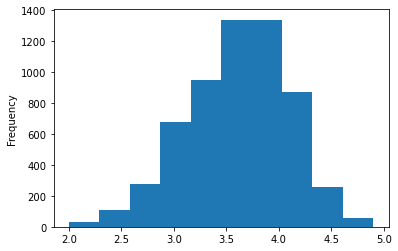

In [50]:
df['rating'].plot(kind='hist')

In [51]:
df_lower_1 = df[df['rating']<2.7]
df_lower_2 = df[(df['rating'] >= 2.7) & (df['rating'] < 3.3) ]
df_midd = df[ (df['rating'] >= 3.3) & (df['rating'] < 4.0) ] 
df_upp1 = df[ (df['rating'] >= 4.0) & (df['rating'] < 4.5) ] 
df_upp2 = df[ df['rating'] >= 4.5] 

In [52]:
df_lower_1.shape , df_lower_2.shape,  df_midd.shape, df_upp1.shape, df_upp2.shape 

((199, 68), (1185, 68), (2921, 68), (1420, 68), (188, 68))

In [53]:
def sampling (df_input, sampling_row, iteration):
    result = []
    for i in range(iteration):
          result.append(df_input.sample(sampling_row))
    df_result = pd.concat(result)
    return df_result 

In [54]:
# lower 1 
df_lower1 = sampling(df_lower_1, 2, 900)

In [55]:
# lower 2
df_lower2 = sampling(df_lower_2, 2, 800)

In [56]:
# upper 1 
df_upper1 = sampling(df_upp1, 2, 700)

In [57]:
# upper 2 
df_upper2 = sampling(df_upp2, 2, 700)

In [58]:
df_result = pd.concat([df_lower1,df_lower2,df_midd,df_upper1,df_upper2])

In [59]:
df_result.shape

(9121, 68)

<AxesSubplot:ylabel='Frequency'>

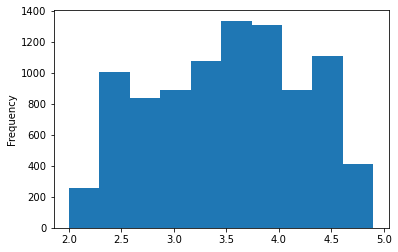

In [60]:
df_result['rating'].plot(kind='hist')

In [61]:
df.to_csv(outputfile)